# PyTorch

### Dataset

In [1]:
from sklearn.datasets import make_blobs
import torch
from torch.utils.data import TensorDataset

n_sample = 100
X, y = make_blobs(n_samples=n_sample, centers=2, n_features=2, cluster_std=0.7)

dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))

print(type(X[0]), X[0].shape, X[0].dtype)
print(type(y[0]), y[0].shape, y[0].dtype)

<class 'numpy.ndarray'> (2,) float64
<class 'numpy.int64'> () int64


### DataLoader

In [8]:
from sklearn.datasets import make_blobs

import torch
from torch.utils.data import TensorDataset, DataLoader

n_sample = 100
X, y = make_blobs(n_samples=n_sample, centers=2, n_features=2, cluster_std=0.7)

dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))

BATCH_SIZE = 8 # 보통 2의 배수로 넣음
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

for X_, y_ in data_loader:
    print(type(X_), X_.shape, X_.dtype)
    print(type(y_), y_.shape, y_.dtype)

<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8]) torch.float32
<class 'torch.Tenso

### moon, batch 16

In [7]:
from sklearn.datasets import make_moons

import torch
from torch.utils.data import TensorDataset, DataLoader

n = 100

X, y = make_moons(n_samples=n)

dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
print(dataset)

### Layer
- fully connected

In [10]:
import torch.nn as nn

fc = nn.Linear(in_features=8, out_features=4)

print(fc.weight.shape)
print(fc.bias.shape)

torch.Size([4, 8])
torch.Size([4])


### Sigmoid

In [12]:
import torch
import torch.nn as nn

test_input = torch.randn(size=(2, 3))
sigmoid = nn.Sigmoid()
test_output = sigmoid(test_input)

print("===== Test Input =====")
print(test_input, "\n")

print("===== nn.Sigmoid Output =====")
print(test_output, "\n")

print("===== Manual Computation =====")
print(1 / (1 + torch.exp(-test_input)))

===== Test Input =====
tensor([[-0.3560, -0.6499, -0.1074],
        [ 0.8543,  1.1365,  1.7497]]) 

===== nn.Sigmoid Output =====
tensor([[0.4119, 0.3430, 0.4732],
        [0.7015, 0.7570, 0.8519]]) 

===== Manual Computation =====
tensor([[0.4119, 0.3430, 0.4732],
        [0.7015, 0.7570, 0.8519]])


### BCE Loss

In [15]:
import torch
import torch.nn as nn

test_pred = torch.tensor([0.8])
test_y = torch.tensor([1.])

loss_function = nn.BCELoss()
test_output = loss_function(test_pred, test_y)

print("===== Test Input =====")
print(f"pred = {test_pred}")
print(f"y = {test_y} \n")

print("===== nn.BCELoss Output =====")
print(f"test_output = {test_output} \n")

print("===== Manual Computation =====")
print(-(test_y*torch.log(test_pred) + (1-test_y)*torch.log(1-test_pred)))

===== Test Input =====
pred = tensor([0.8000])
y = tensor([1.]) 

===== nn.BCELoss Output =====
test_output = 0.2231435328722 

===== Manual Computation =====
tensor([0.2231])


### Model

In [17]:
import torch.nn as nn

class Model(nn.Module):

  def __init__(self):
    super(Model, self).__init_()

  def forward(self, x):
    pass

### R 10 space, neuron[5, 2, 1]

In [161]:
import torch.nn as nn
import torch

class Model(nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer_1 = nn.Linear(in_features=10, out_features=5)
    self.activation_1 = nn.Sigmoid()
    self.layer_2 = nn.Linear(in_features=5, out_features=2)
    self.activation_2 = nn.Sigmoid()
    self.layer_3 = nn.Linear(in_features=2, out_features=1)
    self.activation_3 = nn.Sigmoid()

  def forward(self, x):
    y_1 = self.layer_1(x)
    y_2 = self.layer_2(self.activation_1(y_1))
    y_3 = self.layer_3(self.activation_2(y_2))
    return self.activation_3(y_3)

model = Model()
dataset = torch.FloatTensor(torch.randn(10, 10))
y_hat = model(dataset)
print(y_hat)


tensor([[0.5007],
        [0.5015],
        [0.5061],
        [0.5016],
        [0.5003],
        [0.4965],
        [0.5059],
        [0.5003],
        [0.4982],
        [0.5016]], grad_fn=<SigmoidBackward0>)


### Blobs Model

In [152]:
from sklearn.datasets import make_blobs

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

n_sample = 100
X, y = make_blobs(n_samples=n_sample, centers=2, n_features=2, cluster_std=0.7)
dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
BATCH_SIZE = 10
data_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE)

class BlobModel(nn.Module):

  def __init__(self):
    super(BlobModel, self).__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=1)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    z = self.layer_1(x)
    pred = self.activation(z)
    return pred.view(-1)

model = BlobModel()


In [162]:
from torch.optim import SGD

LR = 0.1
DEVICE = None
if torch.cuda.is_available():
  DEVICE = "cuda"
elif torch.backends.mps.is_available():
  DEVICE = "mps"
else:
  DEVICE = "cpu"

model = BlobModel().to(DEVICE)
loss_function = nn.BCELoss(reduction="mean")
optimizer = SGD(model.parameters(), lr=LR)

### Training

In [163]:
EPOCHS = 10
e_list, accs = [], []
for epoch in range(EPOCHS):
  epoch_loss = 0.
  n_corrects = 0
  for X, y in data_loader:
    X, y = X.to(DEVICE), y.to(DEVICE)

    pred = model(X)
    loss = loss_function(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item() * len(X)
    proba = (pred > 0.5).type(torch.float)
    n_corrects += (proba == y).sum().item()

  epoch_loss /= n_sample
  e_list.append(epoch_loss)
  accs.append(n_corrects / n_sample)
  print(f"Epoch: {epoch + 1}")
  print(f"Loss: {epoch_loss:.4f}\n")

Epoch: 1
Loss: 0.2378

Epoch: 2
Loss: 0.0381

Epoch: 3
Loss: 0.0229

Epoch: 4
Loss: 0.0165

Epoch: 5
Loss: 0.0129

Epoch: 6
Loss: 0.0106

Epoch: 7
Loss: 0.0090

Epoch: 8
Loss: 0.0079

Epoch: 9
Loss: 0.0070

Epoch: 10
Loss: 0.0063



### Visualization

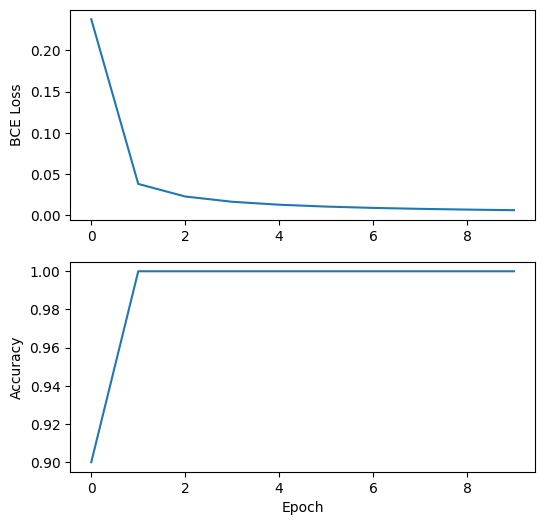

In [165]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(6, 6), nrows=2, ncols=1)
axes[0].plot(range(len(e_list)), e_list)
axes[1].plot(range(len(accs)), accs)
axes[0].set_ylabel("BCE Loss")
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Epoch")
plt.show()